#### For this homework you can get 100 points + 20 bonus points. The bonus points will be counted into your total homework score until you get the maximum homework score, 400.

Copying and pasting other people's code is absolutely prohibited.  I will report to the education team if I find any such cases. Collaboration and discussion is highly encouraged, and feel free to exchange ideas with your classmates, but write your own code please. 

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

**Answer:** When designing a public policy involving an algorithm, it may be a good idea to choose _interpretability_ over _accuracy_. This could be true for a number of reasons. To begin with, accountability is better achieved when government procedures are more transparent. Also, if these methods are really difficult to interpret and understand, the scope of possible agents that could oversight the process diminishes. Further more, if we want to influence people behavior with this algorithm by reinforce a certain behavior or punish another, is better that "the rules" begin this decision are clear so the people involved can play the game with better information. For example, an algorithm that will determine whether an ex-convict is going to be released or not before the original sentence, both the inmate and society as a whole surely will want to know what sort of ground there is for that decision. Or we could have a model that tries to come with a prediction for traffic accidents. People attitudes are a major factor. If people wants to understand what could get them involved in a traffic accident to avoid it,  _interpretability_ is a major factor.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

**Answer:** On the other side, if we try to come with a good prediction based on which an investment will be made, or some company expects to obtain some profit, stakeholders will be more interested in better predictions through _accuracy_ rather than _interpretability_. Amazon may want to predict if a given user will buy a certain product. The algorithm's capability to predict this will have an impact on the company's profits. While the algorithm work as expected, _interpretability_ won't be an issue.  

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

**Answer:** After using random forest classifiers I would try to find the single decision tree that approaches the most in terms of prediction power.

###  Question 2: Build a tree by hand following exactly the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes. (30 pts + 20 pts)

30 points for parts a, b, c, d, f.
20 bonus points for optional part e.

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus


In [2]:
data='MPG, cylinders, HP, weight\ngood, 4, 75, light\nbad, 6, 90, medium\nbad, 4, 110, medium\nbad, 8, 175, weighty\nbad, 6, 95, medium\nbad, 4, 94, light\nbad, 4, 95, light\nbad, 8, 139, weighty\nbad, 8, 190, weighty\nbad, 8, 145, weighty\nbad, 6, 100, medium\ngood, 4, 92, medium\nbad, 6, 100, weighty\nbad, 8, 170, weighty\ngood, 4, 89, medium\ngood, 4, 65, light\nbad, 6, 85, medium\ngood, 4, 81, light\nbad, 6, 95, medium\ngood, 4, 93, light'

In [3]:
data=",".join(data.split(", "))
print data

MPG,cylinders,HP,weight
good,4,75,light
bad,6,90,medium
bad,4,110,medium
bad,8,175,weighty
bad,6,95,medium
bad,4,94,light
bad,4,95,light
bad,8,139,weighty
bad,8,190,weighty
bad,8,145,weighty
bad,6,100,medium
good,4,92,medium
bad,6,100,weighty
bad,8,170,weighty
good,4,89,medium
good,4,65,light
bad,6,85,medium
good,4,81,light
bad,6,95,medium
good,4,93,light


#### Please use numpy and pandas to do the calculation for parts a) through d):

a) Prepare the data set to a pandas dataframe from the given string (2 pts)


In [4]:
from StringIO import StringIO    

In [5]:
TESTDATA=StringIO(data)
df = pd.read_csv(TESTDATA)
#convert features that are categorical into the proper format
df.MPG = df.MPG.astype('category')
df.cylinders = df.cylinders.astype('category')
df.weight = df.weight.astype('category')
print df.dtypes
df.head()

MPG          category
cylinders    category
HP              int64
weight       category
dtype: object


,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium


b) Start with the entire dataset and find the most common value (3 pts)



In [6]:
df.MPG.value_counts()[df.MPG.value_counts().index.categories == 'bad']

bad    14
Name: MPG, dtype: int64

In [7]:
#mpg = df.MPG.astype('category')
#dict(enumerate(mpg.cat.categories))

In [8]:
print 'Most common value for MPG in the entire dataset is:',df.MPG.mode()[0]
df.MPG.value_counts()

Most common value for MPG in the entire dataset is: bad


bad     14
good     6
Name: MPG, dtype: int64

c) Use "information gain" as your decision rule to split your data into two groups. What is the split rule and what is the maximum value of the information gain? (5 pts)


In [10]:
def f_term(a,b):
    '''
    Computes one term of the function
    '''
    try:
        out = a * np.log2((a+b)*1.0 / a) 
    except ZeroDivisionError:
        out = 0.
    return out

def f_full(x,y):
    '''
    Computes the entire function needed for computing information gain
    '''
    return f_term(x,y) + f_term(y,x)

def informationGain(a,b,c,d):
    '''
    Computes the information gain
    '''
    num = f_full((a + c),(b + d)) - f_full(a,b) - f_full(c,d) 
    denom = a + b + c + d
    return num / denom

In [11]:
def infoGainWrapper(dataset,columnName,typeOfVar,label,infoGainBench,nodeMask,descriptionOriginal):
        
    infoGainBench = infoGainBench
    nodeMask = nodeMask
    
    descriptionBench = descriptionOriginal
    
    if typeOfVar == 'int64':
        
        comparisonSymbol = '>'
        for i in range(0,len(dataset[columnName])-1):
                
            category = dataset[columnName].sort_values()[i:i + 2].mean()
                
            node = dataset[columnName] > category


            goodT = (dataset[label][node]== 'good').sum()
            badT = (dataset[label][node]== 'bad').sum()
            goodF = (dataset[label][~node]== 'good').sum()
            badF = (dataset[label][~node]== 'bad').sum()
                
            infoGainValue = informationGain(int(goodT),int(badT),int(goodF),int(badF))
            description = columnName + ' ' + comparisonSymbol + ' ' +   str(category)

    #decission mechanism for selecting final node mask
                    #if the value just obtained is bigger,
            if (infoGainValue > infoGainBench):
                nodeMask = node               # set the new node
                infoGainBench = infoGainValue # and the info gain benchmark is changed
                descriptionBench = description
                    #if are the same
            elif (infoGainValue == infoGainBench) & (infoGainBench != 0):
                #flit a coin wether gets change or not
                if bool(random.getrandbits(1)):
                    nodeMask = node
                    infoGainBench = infoGainValue
                    descriptionBench = description
                        
                    

    
    elif typeOfVar == 'category':
        
        comparisonSymbol = '='
        for category in dataset[columnName].values.categories:
            #set a rule for the node
            node = dataset[columnName] == category

            goodT = (dataset[label][node]== 'good').sum()
            badT = (dataset[label][node]== 'bad').sum()
            goodF = (dataset[label][~node]== 'good').sum()
            badF = (dataset[label][~node]== 'bad').sum()
                
            infoGainValue = informationGain(int(goodT),int(badT),int(goodF),int(badF))
            description = columnName + ' ' + comparisonSymbol + ' ' +   str(category)
                
    #decission mechanism for selecting final node mask
                    #if the value just obtained is bigger,
            if (infoGainValue > infoGainBench):
                nodeMask = node               # set the new node
                infoGainBench = infoGainValue # and the info gain benchmark is changed
                descriptionBench = description
                    #if are the same
                    
            #CAMBIO
            #elif (infoGainValue == infoGainBench) & (infoGainBench != 0):
            elif (infoGainValue == infoGainBench):
                #flit a coin wether gets change or not
                
                if bool(random.getrandbits(1)):
                    nodeMask = node
                    infoGainBench = infoGainValue
                    descriptionBench = description
           
                
    
    return [infoGainBench,nodeMask,descriptionBench]
    
def infoGainDataset(dataset,label):
    '''
    This function takes a dataset an returns a
    dictionary with :
    - the query term for each variable as key
    - the information gain as value
    Type of the variable should be either :
    category or int64
    '''

    types = dataset.dtypes
    variablesName = dataset.dtypes.index
    
    #globalDict = {}
    
    #CAMBIO
    #infoGainBenchGlobal = 0.0
    infoGainBenchGlobal = -1
    nodeMaskGlobal = None
    descriptionGlobal = ''
    
    for i in range(types.shape[0]):
        
        #not run info gian evaluation on the label variable
        if variablesName[i] == label:
            continue
        infoGainTuple = infoGainWrapper(dataset = dataset,
                              columnName = variablesName[i],
                              typeOfVar = types[variablesName[i]],
                             label = label,
                                      infoGainBench = infoGainBenchGlobal,
                                       nodeMask = nodeMaskGlobal,
                                       descriptionOriginal = descriptionGlobal)
        
        
        if (infoGainTuple[0] > infoGainBenchGlobal):
            nodeMaskGlobal = infoGainTuple[1]               # set the new node
            infoGainBenchGlobal = infoGainTuple[0] # and the info gain benchmark is changed
            descriptionGlobal = infoGainTuple[2]
        #if are the same
        elif (infoGainTuple[0] == infoGainBenchGlobal) & (infoGainBenchGlobal != 0):
                        #flit a coin wether gets change or not
            if bool(random.getrandbits(1)):
                nodeMaskGlobal = infoGainTuple[1]               # set the new node
                infoGainBenchGlobal = infoGainTuple[0]
                descriptionGlobal = infoGainTuple[2]
    
    return [infoGainBenchGlobal,nodeMaskGlobal,descriptionGlobal]

For the first division I would use 'HP > 93.5' a the first node in the tree

In [12]:
infoGainDataset(df,label='MPG')

[0.55677964944703962, 0     False
 1     False
 2      True
 3      True
 4      True
 5      True
 6      True
 7      True
 8      True
 9      True
 10     True
 11    False
 12     True
 13     True
 14    False
 15    False
 16    False
 17    False
 18     True
 19    False
 Name: HP, dtype: bool, 'HP > 93.5']


d) Repeat the process b) and c) until that you can perfectly split the training data.  Show the resulting decision tree in a format of your choice, as long as the tree structure and the prediction at each leaf node are clearly shown.  Note that you are _not_ expected to prune the tree in parts d) and e). (10 pts)

In [13]:
def treeFunction(dataset,label):
    insumo = infoGainDataset(dataset,label)
    if insumo[0] == 0.0:
        print dataset
        print 'Prediction:',dataset[label].value_counts().index[0]
        return dataset
    else:
        datasetYes = dataset[insumo[1]]
        datasetNo = dataset[~insumo[1]]
        print 'Node:',insumo[2]
        return [treeFunction(datasetYes,label),treeFunction(datasetNo,label)]


In [14]:
treeFunction(df,'MPG')

Node: HP > 93.5
    MPG cylinders   HP   weight
2   bad         4  110   medium
3   bad         8  175  weighty
4   bad         6   95   medium
5   bad         4   94    light
6   bad         4   95    light
7   bad         8  139  weighty
8   bad         8  190  weighty
9   bad         8  145  weighty
10  bad         6  100   medium
12  bad         6  100  weighty
13  bad         8  170  weighty
18  bad         6   95   medium
Prediction: bad
Node: cylinders = 6
    MPG cylinders  HP  weight
1   bad         6  90  medium
16  bad         6  85  medium
Prediction: bad
     MPG cylinders  HP  weight
0   good         4  75   light
11  good         4  92  medium
14  good         4  89  medium
15  good         4  65   light
17  good         4  81   light
19  good         4  93   light
Prediction: good


[    MPG cylinders   HP   weight
 2   bad         4  110   medium
 3   bad         8  175  weighty
 4   bad         6   95   medium
 5   bad         4   94    light
 6   bad         4   95    light
 7   bad         8  139  weighty
 8   bad         8  190  weighty
 9   bad         8  145  weighty
 10  bad         6  100   medium
 12  bad         6  100  weighty
 13  bad         8  170  weighty
 18  bad         6   95   medium, [    MPG cylinders  HP  weight
  1   bad         6  90  medium
  16  bad         6  85  medium,      MPG cylinders  HP  weight
  0   good         4  75   light
  11  good         4  92  medium
  14  good         4  89  medium
  15  good         4  65   light
  17  good         4  81   light
  19  good         4  93   light]]



e)*OPTIONAL- 20 bonus points* 
Define a function: Tree(data_train, data_test) which learns a decision tree from data_train and uses it to predict the values for data_test.

Example:

##### Input of the desired function:

data_train="good,4,75,light\nbad,6,90,medium\nbad,4,110,medium"

data_test="?,6,95,medium\n?,4,93,light"

##### Output of the desired function should be data_test with the unknown values replaced by your tree's predictions, e.g.:

data_test_predicted="bad,6,95,medium\ngood,4,93,light"

f) Classify the following five vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  You can do this by hand using the tree structure learned in part d), or automatically using the function you wrote in part e). (10 pts)

?,4,93,weighty
?,8,70,light
?,6,113,medium
?,6,95,weighty
?,4,115,medium


### Question 3, Predicting burden of disease （40 pts)

In [15]:
data=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Burden of diarrheal illness by country.csv")
print("Here are the first three rows:")
data.iloc[0:3,:]

Here are the first three rows:


,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


#### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features using sklearn.tree.DecisionTreeClassifier. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a test/train split and choose a hyper-parameter governing model simplicity. For example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier for different values of this parameter and for each such value, record the corresponding AUC score. (10 pts)


In [16]:
from sklearn.cross_validation import train_test_split

X = data.drop(['Country','BurdenOfDisease'],axis=1).values
Y = pd.get_dummies(data.BurdenOfDisease)
Y_awful = Y.awful.values
Y_high = Y.high.values
Y_low = Y.low.values
Y_medium = Y.medium.values

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
test = np.random.binomial(1,.33,size=data.shape[0])==1

In [18]:
X_train = X[~test]
X_test = X[test]

Y_awful_train = Y_awful[~test]
Y_high_train = Y_high[~test]
Y_low_train = Y_low[~test]
Y_medium_train = Y_medium[~test]

Y_awful_test = Y_awful[test]
Y_high_test = Y_high[test]
Y_low_test = Y_low[test]
Y_medium_test = Y_medium[test]

In [19]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs

In [20]:

OSnodes_awful=[]
OSnodes_high=[]
OSnodes_low=[]
OSnodes_medium=[]

#OSfeatures=[]
for i in range(2,50,1):
    rfNodes=DTC(max_leaf_nodes=i)
    
    rfNodes.fit(X_train,Y_awful_train)
    pred=rfNodes.predict(X_test)
    OSnodes_awful.append(rs(Y_awful_test,pred))
    
    rfNodes.fit(X_train,Y_high_train)
    pred=rfNodes.predict(X_test)
    OSnodes_high.append(rs(Y_high_test,pred))
    
    rfNodes.fit(X_train,Y_low_train)
    pred=rfNodes.predict(X_test)
    OSnodes_low.append(rs(Y_low_test,pred))
    
    rfNodes.fit(X_train,Y_medium_train)
    pred=rfNodes.predict(X_test)
    OSnodes_medium.append(rs(Y_medium_test,pred))


    


b) Make a plot of performance vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be AUC score. (10 pts)

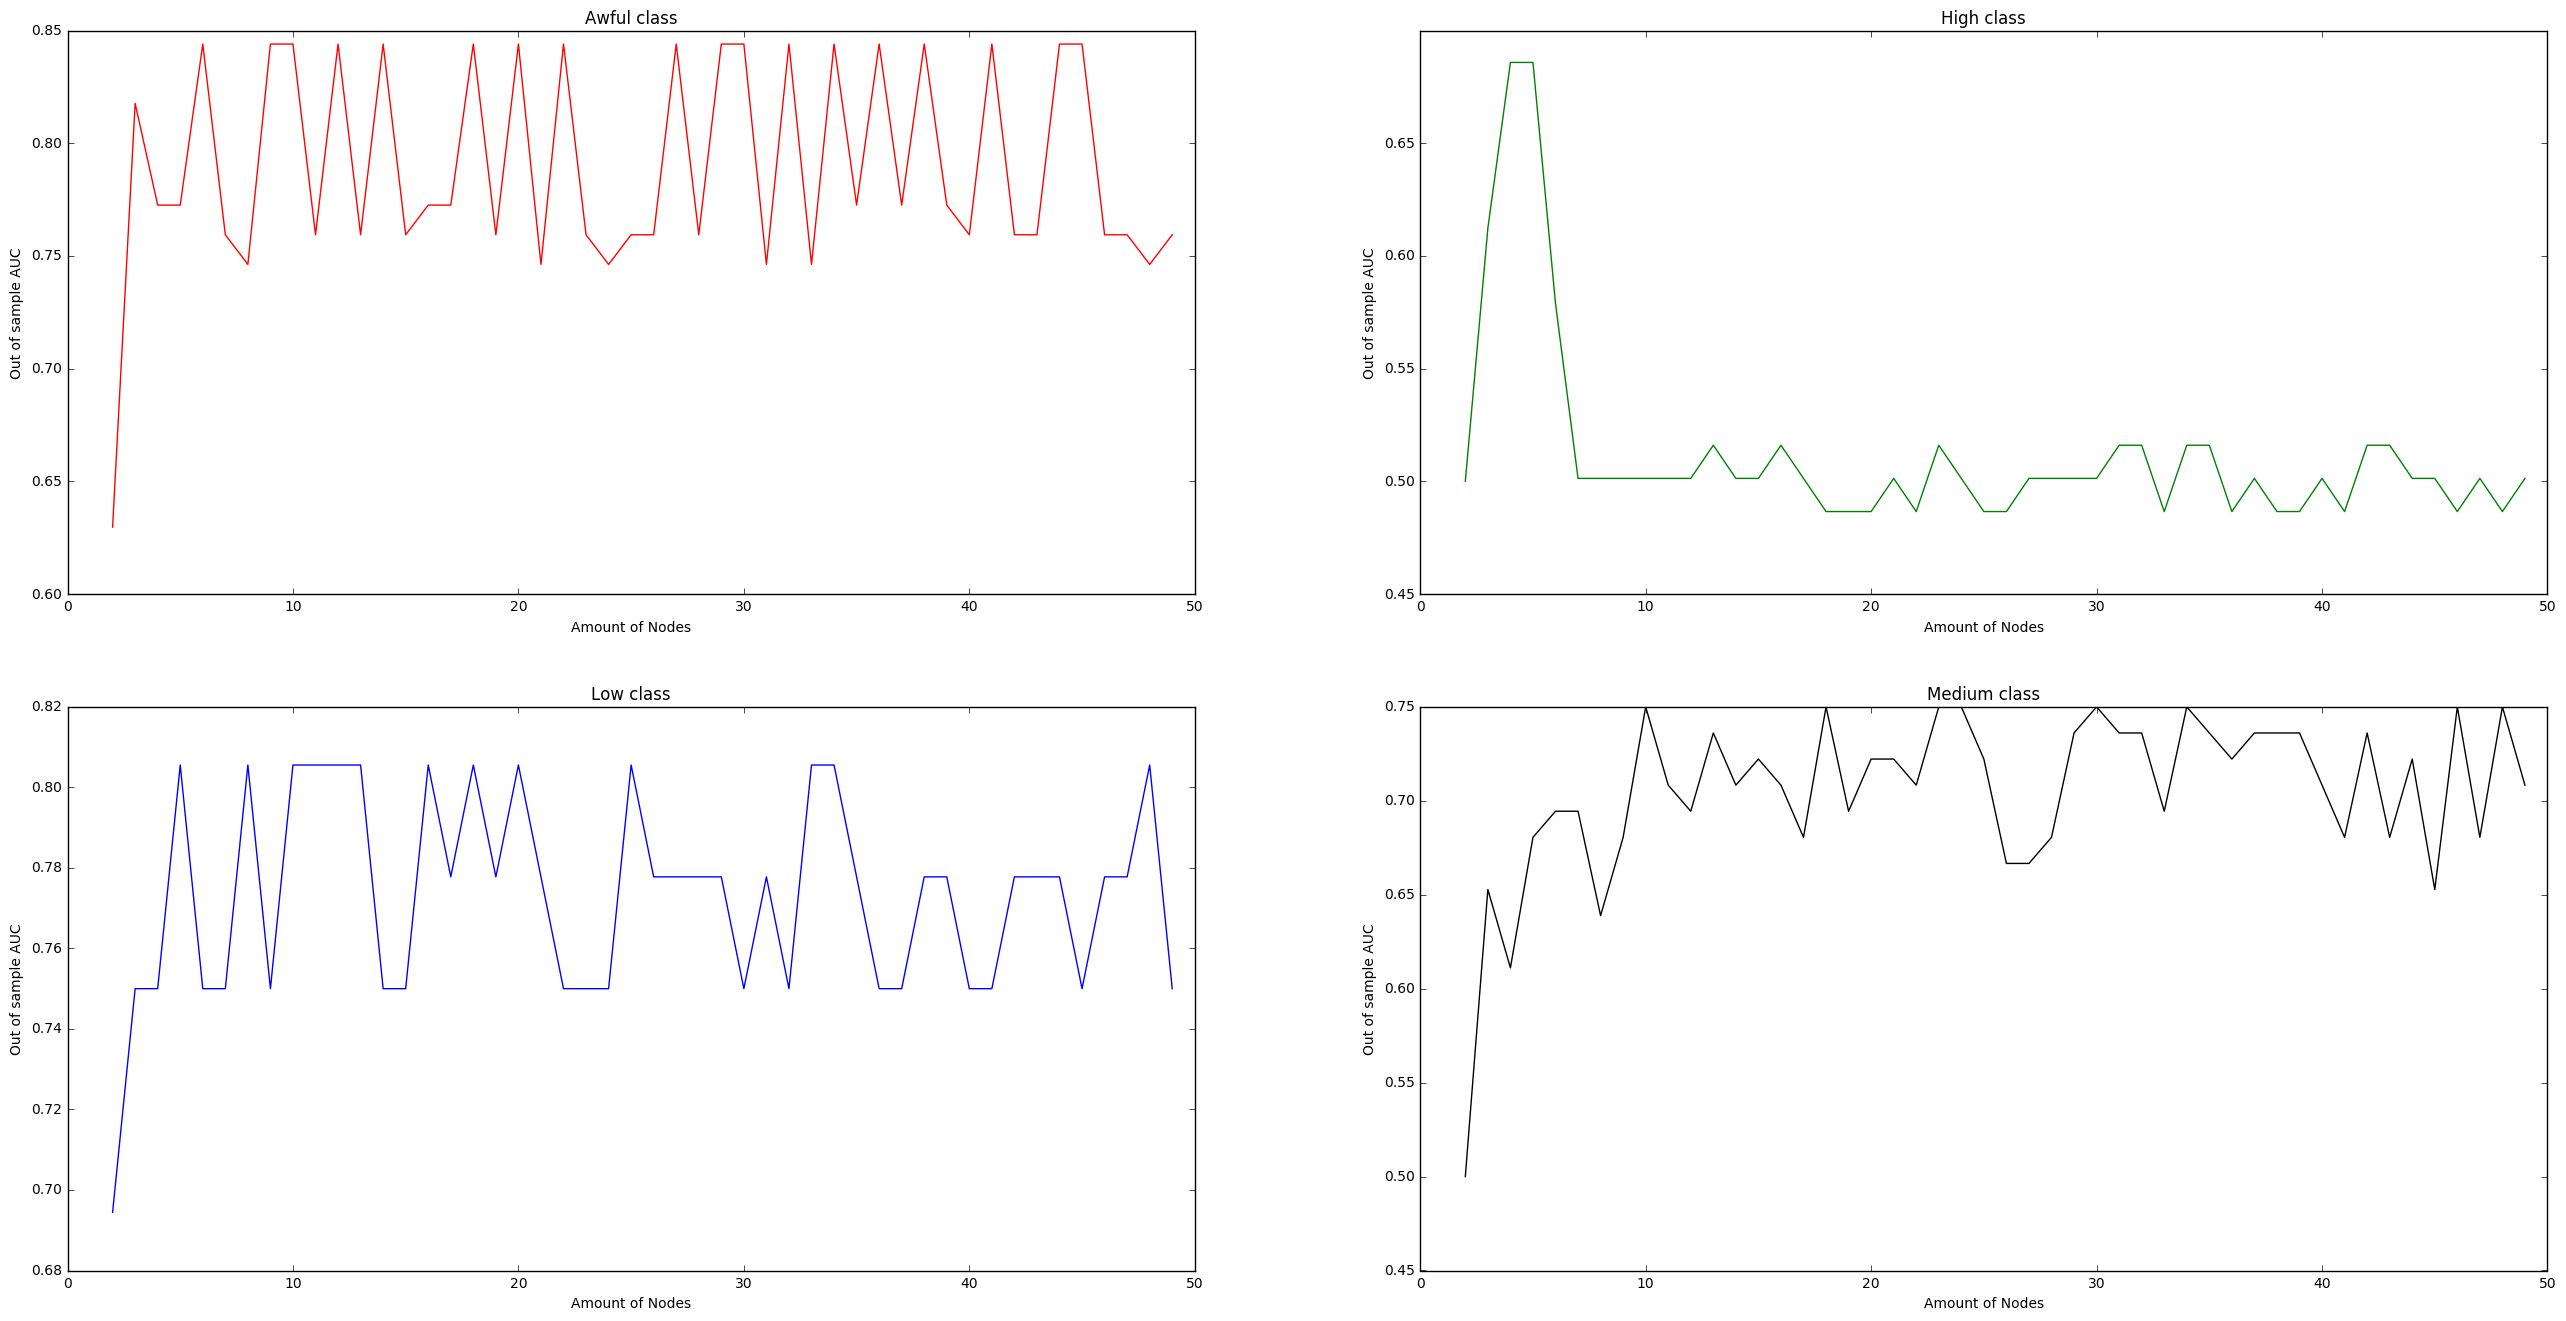

In [22]:
import matplotlib.pylab as plt
%matplotlib inline
fig = plt.figure(figsize=(32,16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(range(2,50,1),OSnodes_awful,'r-')
ax1.set_title('Awful class')
ax1.set_xlabel('Amount of Nodes')
ax1.set_ylabel('Out of sample AUC')

ax2.plot(range(2,50,1),OSnodes_high,'g-')
ax2.set_title('High class')
ax2.set_xlabel('Amount of Nodes')
ax2.set_ylabel('Out of sample AUC')

ax3.plot(range(2,50,1),OSnodes_low,'b-')
ax3.set_title('Low class')
ax3.set_xlabel('Amount of Nodes')
ax3.set_ylabel('Out of sample AUC')


ax4.plot(range(2,50,1),OSnodes_medium,'k-')
ax4.set_title('Medium class')
ax4.set_xlabel('Amount of Nodes')
ax4.set_ylabel('Out of sample AUC')


c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the OS accuracy after tuning the hyper-parameter? (10 pts)

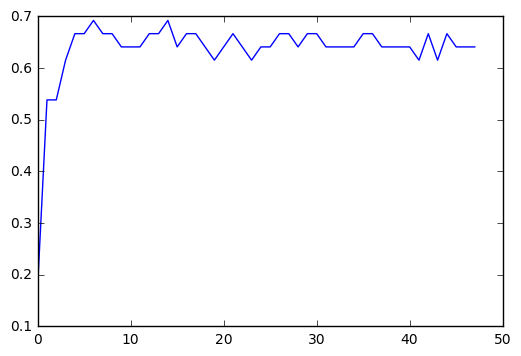

In [23]:
OS = []
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=999)

for i in range(2,50,1):
    rf=DTC(max_leaf_nodes=i)
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))
    
plt.plot(OS)

The best parameter in terms of accuracy appears to be 6 maximum leaf nodes

d) Visualize a simple decision tree (e.g. a “shallow” tree, or a tree with
few leaf nodes) classifier and report its performance. You can draw
the decision tree by hand or use a graphical representation (e.g.
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), but make sure it is easy to understand (e.g. the
features chosen for each split should be clearly labeled in each
internal node, as well as the prediction at each leaf node). (10 pts)

In [34]:
Ytext = data.BurdenOfDisease.values
Ytext_train = Ytext[~test]
Ytext_test = Ytext[test]

In [52]:
rf=DTC(max_leaf_nodes=6)
rf.fit(X,Ytext)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

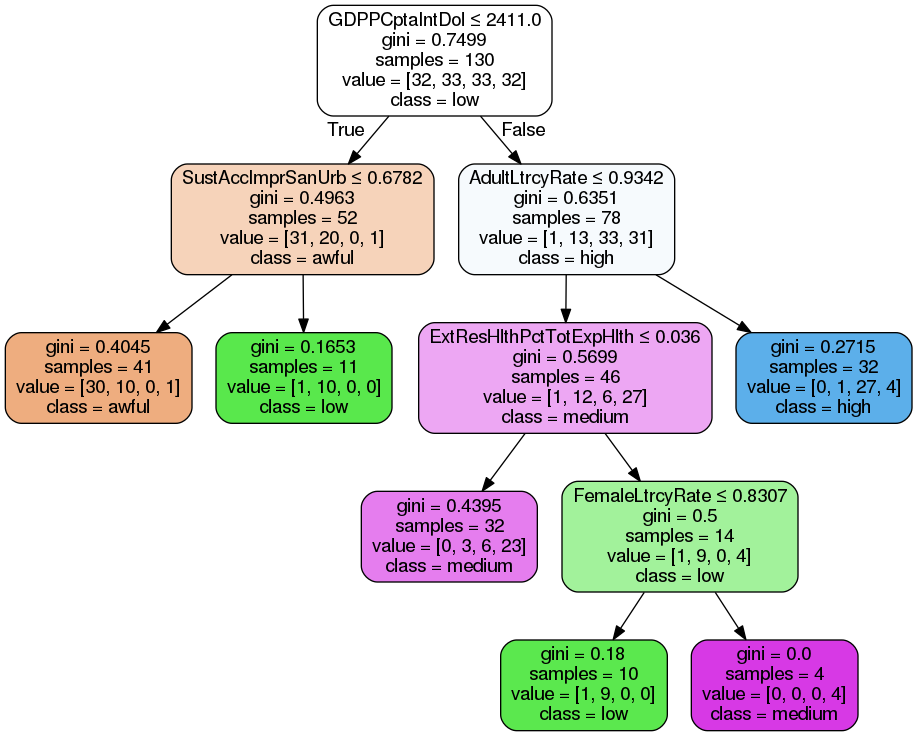

In [53]:
dot_data = tree.export_graphviz(rf,out_file=None,feature_names=list(data.columns)[1:-1],  
                         class_names=['awful', 'low', 'high','medium'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 2c). (10 pts)



In [64]:
from sklearn.ensemble import RandomForestClassifier as RFC


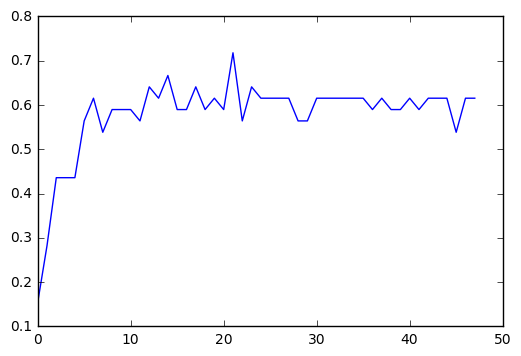

In [63]:
OSrandomForest = []
for i in range(2,50,1):
    rf = RFC(n_estimators=30, n_jobs=-1,max_leaf_nodes=i)
    rf.fit(X_train, Y_train)
    OSrandomForest.append(rf.score(X_test,Y_test))
    
plt.plot(OSrandomForest)

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

In terms of accuracy we could say that the *Decision Tree* approach is slightly better (almost 70%) than *Random Forest* (just above 60%). At the same time, in terms of interpretability, with *Decision Tree* we end up with a relatively parsimonious tree with 5 rules and 6 leaf nodes 